In [6]:
import pandas as pd

# Read an Excel file
file_path = 'state_M2022_dl.xlsx'  # Replace with your Excel file path
df = pd.read_excel(file_path)

# Define the regular expression for the pattern 'xx-0000'
# The pattern \d{2}-0000 will match any string that has two digits followed by '-0000'
pattern1 = r'\d{2}-0000'
pattern2 = r'\Guam|Puerto Rico|Virgin Islands'

# Filter rows where the column matches the pattern
filtered_df = df[df['OCC_CODE'].str.contains(pattern1, na=False)]
filtered_df = df[~df['AREA_TITLE'].str.contains(pattern2, na=False)]

# Save the filtered DataFrame to a new Excel file, if needed
output_path = 'filtered_state_M2022_dl.xlsx'
filtered_df.to_excel(output_path, index=False)


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

/tmp/ipykernel_97/1721011409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TOT_EMP'] = pd.to_numeric(filtered_df['TOT_EMP'], errors='coerce')


51


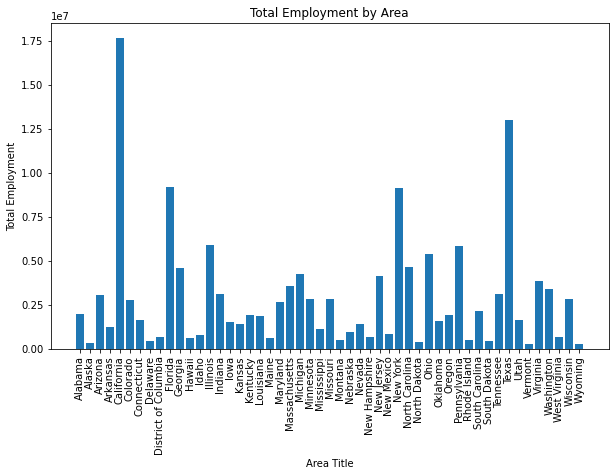

0                    Alabama
23                    Alaska
46                   Arizona
69                  Arkansas
92                California
115                 Colorado
138              Connecticut
161                 Delaware
184     District of Columbia
207                  Florida
230                  Georgia
253                   Hawaii
276                    Idaho
299                 Illinois
322                  Indiana
345                     Iowa
368                   Kansas
391                 Kentucky
414                Louisiana
437                    Maine
460                 Maryland
483            Massachusetts
506                 Michigan
529                Minnesota
552              Mississippi
575                 Missouri
598                  Montana
621                 Nebraska
644                   Nevada
667            New Hampshire
690               New Jersey
713               New Mexico
736                 New York
759           North Carolina
782           

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read an Excel file
file_path = 'filtered_state_M2022_dl.csv'  # Replace with your Excel file path
df = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Plot a bar chart
plt.figure(figsize=(10, 6))
# Convert 'TOT_EMP' to numeric, if it's not already
filtered_df['TOT_EMP'] = pd.to_numeric(filtered_df['TOT_EMP'], errors='coerce')
print(len(filtered_df['AREA_TITLE']))

plt.bar(filtered_df['AREA_TITLE'], filtered_df['TOT_EMP'])
plt.xlabel('Area Title')
plt.ylabel('Total Employment')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Total Employment by Area')

# Adjust the y-axis to better display the data
plt.yscale('linear')  # Ensures a linear scale for y-axis

plt.show()
print(filtered_df['AREA_TITLE'])
# print(filtered_df['TOT_EMP'])

In [5]:
import pandas as pd

# Load the dataset
file_path = 'filtered_state_M2022_dl.csv'
data = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Calculate the mean and variance of 'A_MEAN' across different states for each occupation
mean_across_states = filtered_df.groupby('OCC_TITLE')['A_MEDIAN'].mean()
variance_across_states = filtered_df.groupby('OCC_TITLE')['A_MEDIAN'].var()

# Combine the results into a single DataFrame
occupation_stats_df = pd.DataFrame({
    'Mean Across States': mean_across_states, 
    'Variance Across States': variance_across_states
}).reset_index()

# Display the results for the first few occupations
occupation_stats_df.head()

,OCC_TITLE,Mean Across States,Variance Across States
0,All Occupations,45725.490196,5.303119e+07


In [6]:
import pandas as pd

# Load the dataset
file_path = 'filtered_state_M2022_dl.csv'
data = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Calculate the mean and variance of 'A_MEAN' among different occupations within each state
mean_among_occupations = data.groupby('AREA_TITLE')['A_MEDIAN'].mean()
variance_among_occupations = data.groupby('AREA_TITLE')['A_MEDIAN'].var()

# Combine the results into a single DataFrame for display
variance_among_occupations_df = pd.DataFrame({
    'Mean Among Occupations': mean_among_occupations, 
    'Variance Among Occupations': variance_among_occupations
}).reset_index()

# Display the DataFrame
variance_among_occupations_df.head()


,AREA_TITLE,Mean Among Occupations,Variance Among Occupations
0,Alabama,48216.521739,4.512355e+08
1,Alaska,59715.217391,4.891233e+08
2,Arizona,52545.652174,4.328109e+08
3,Arkansas,45261.739130,2.661415e+08
4,California,66185.217391,1.070270e+09


/tmp/ipykernel_97/1221009851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['A_MEDIAN'] = pd.to_numeric(filtered_df['A_MEDIAN'], errors='coerce')


51


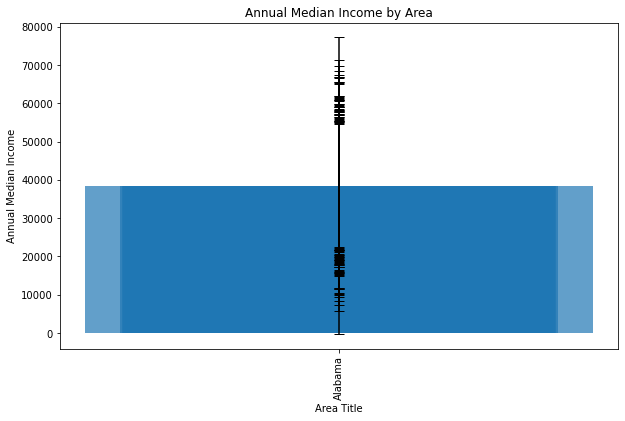

0                    Alabama
23                    Alaska
46                   Arizona
69                  Arkansas
92                California
115                 Colorado
138              Connecticut
161                 Delaware
184     District of Columbia
207                  Florida
230                  Georgia
253                   Hawaii
276                    Idaho
299                 Illinois
322                  Indiana
345                     Iowa
368                   Kansas
391                 Kentucky
414                Louisiana
437                    Maine
460                 Maryland
483            Massachusetts
506                 Michigan
529                Minnesota
552              Mississippi
575                 Missouri
598                  Montana
621                 Nebraska
644                   Nevada
667            New Hampshire
690               New Jersey
713               New Mexico
736                 New York
759           North Carolina
782           

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read an Excel file
file_path = 'filtered_state_M2022_dl.csv'  # Replace with your Excel file path
df = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Plot a bar chart
plt.figure(figsize=(10, 6))
# Convert 'TOT_EMP' to numeric, if it's not already
filtered_df['A_MEDIAN'] = pd.to_numeric(filtered_df['A_MEDIAN'], errors='coerce')
print(len(filtered_df['AREA_TITLE']))

plt.bar(filtered_df['AREA_TITLE'].values[0], filtered_df['A_MEDIAN'].values[0], mean_among_occupations, yerr=np.sqrt(variance_among_occupations), capsize=5, alpha=0.7, label='Mean Income')
# plt.bar(filtered_df['AREA_TITLE'], filtered_df['A_MEDIAN'])
plt.xlabel('Area Title')
plt.ylabel('Annual Median Income')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Annual Median Income by Area')

# Adjust the y-axis to better display the data
# plt.yscale('linear')  # Ensures a linear scale for y-axis

plt.show()
print(filtered_df['AREA_TITLE'])
# print(filtered_df['TOT_EMP'])

In [14]:
type(filtered_df['AREA_TITLE'].values())

TypeError: 'numpy.ndarray' object is not callable

In [11]:
import pandas as pd
from scipy import stats

file_path = 'filtered_state_M2022_dl.csv'
df = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

mean_across_states = filtered_df['A_MEAN']

# Z-scores for the 25th and 75th percentiles for a normal distribution
z_75 = stats.norm.ppf(0.75)
z_25 = stats.norm.ppf(0.25)
# print(z_25, z_75)

# Calculate the standard deviation based on IQR and Z-scores
filtered_df['estimated_std_dev'] = (pd.to_numeric(filtered_df['A_PCT75']) - pd.to_numeric(filtered_df['A_PCT25'])) / (Z_75 - Z_25)

# The variance is the square of the standard deviation
filtered_df['estimated_variance'] = filtered_df['estimated_std_dev'] ** 2

print(filtered_df[['AREA_TITLE', 'estimated_std_dev', 'estimated_variance']])


-0.6744897501960817 0.6744897501960817
                AREA_TITLE  estimated_std_dev  estimated_variance
0                  Alabama       23840.234844        5.683568e+08
23                  Alaska       31957.478984        1.021280e+09
46                 Arizona       23521.475485        5.532598e+08
69                Arkansas       19718.602203        3.888233e+08
92              California       35752.939258        1.278273e+09
115               Colorado       32202.108260        1.036976e+09
138            Connecticut       34233.272547        1.171917e+09
161               Delaware       32661.714777        1.066788e+09
184   District of Columbia       60215.866803        3.625951e+09
207                Florida       24396.210470        5.951751e+08
230                Georgia       27035.241442        7.309043e+08
253                 Hawaii       29073.818737        8.452869e+08
276                  Idaho       22520.719358        5.071828e+08
299               Illinois       3163

/tmp/ipykernel_396/1377201835.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['estimated_std_dev'] = (pd.to_numeric(filtered_df['A_PCT75']) - pd.to_numeric(filtered_df['A_PCT25'])) / (Z_75 - Z_25)
/tmp/ipykernel_396/1377201835.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['estimated_variance'] = filtered_df['estimated_std_dev'] ** 2


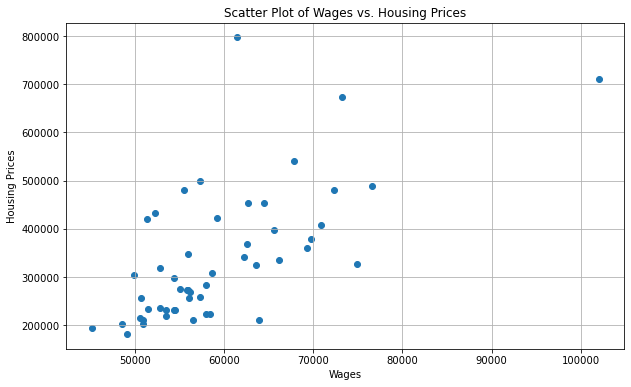

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = 'filtered_state_M2022_dl.csv'
df = pd.read_csv(file_path)
file_path_housing = 'filtered_housing_prices.csv'
df_housing = pd.read_csv(file_path_housing)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']
# filtered_df_housing = filtered_df_housing[filtered_df['OCC_CODE'] == '00-0000']

mean_wages = filtered_df['A_MEAN']
housing_prices = df_housing['Mean of Median of housing price']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_wages, housing_prices)
plt.title('Scatter Plot of Wages vs. Housing Prices')
plt.xlabel('Wages')
plt.ylabel('Housing Prices')
plt.grid(True)
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'mean_wages' and 'housing_prices' are your independent and dependent variables, respectively
X = mean_wages.values.reshape(-1, 1)  # Reshape if necessary
y = housing_prices.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [10.24749009]
Mean squared error: 9499471412.74
Coefficient of determination: -0.39


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

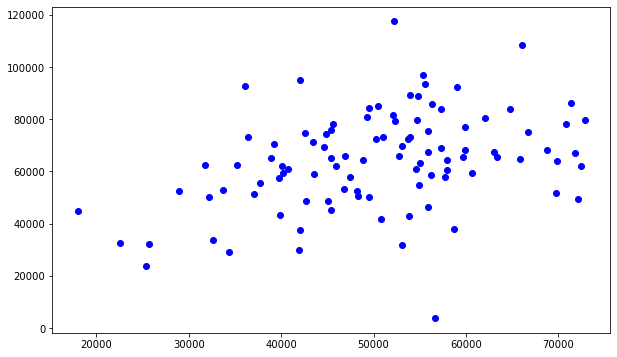

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Convert the hypothetical data to a DataFrame
df = pd.DataFrame({'Wages': wages, 'Housing Prices': housing_prices})

# Perform linear regression
model = LinearRegression()
model.fit(df[['Wages']], df['Housing Prices'])

# Predict values for the given wage range
predicted = model.predict(df[['Wages']])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Wages'], df['Housing Prices'], color='blue')  # actual data points
plt.plot(df['Wages'], predicted, color='red', linewidth=3)  # regression line
plt.title('Linear Regression Analysis of Wages vs. Housing Prices')
plt.xlabel('Wages')
plt.ylabel('Housing Prices')
plt.grid(True)
plt.show()


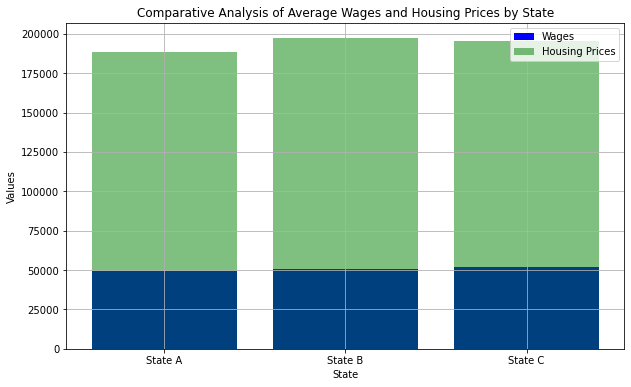

In [18]:
# # Hypothetical data for three states
# groups = pd.DataFrame({
#     'State': ['State A', 'State B', 'State C'] * 100,
#     'Wages': np.random.normal(50000, 10000, 300),
#     'Housing Prices': np.random.normal(200000, 50000, 300)
# })

# # Group by state and calculate average
# grouped = groups.groupby('State').mean().reset_index()

# # Plot grouped bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(grouped['State'], grouped['Wages'], color='blue', label='Wages')
# plt.bar(grouped['State'], grouped['Housing Prices'], color='green', label='Housing Prices', alpha=0.5)
# plt.title('Comparative Analysis of Average Wages and Housing Prices by State')
# plt.xlabel('State')
# plt.ylabel('Values')
# plt.legend()
# plt.grid(True)
# plt.show()


In [1]:
from scipy import stats
stats.t.cdf(2.3299, 5)

0.9663901800000193